In [1]:
import numpy as np
from scipy import sparse 
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
import networkx as nx
import random
import pandas as pd
from datetime import date, timedelta
from collections import Counter
import time
from tqdm import tqdm
random.seed(42)

In [2]:
edges = np.load("edges.npz", allow_pickle=True)["arr_0"]

In [3]:
edges, len(edges)

(array([[ 8124,  5921, 15006],
        [31909, 53838, 14432],
        [31894, 53838, 14432],
        ...,
        [16787, 39834, 19119],
        [29958, 39834, 19119],
        [29958, 16787, 19119]]),
 1291378)

In [4]:
degree_count = {}

for v1, v2, _ in edges:
    degree_count[v1] = degree_count.get(v1, 0) + 1
    degree_count[v2] = degree_count.get(v2, 0) + 1

# Analysis

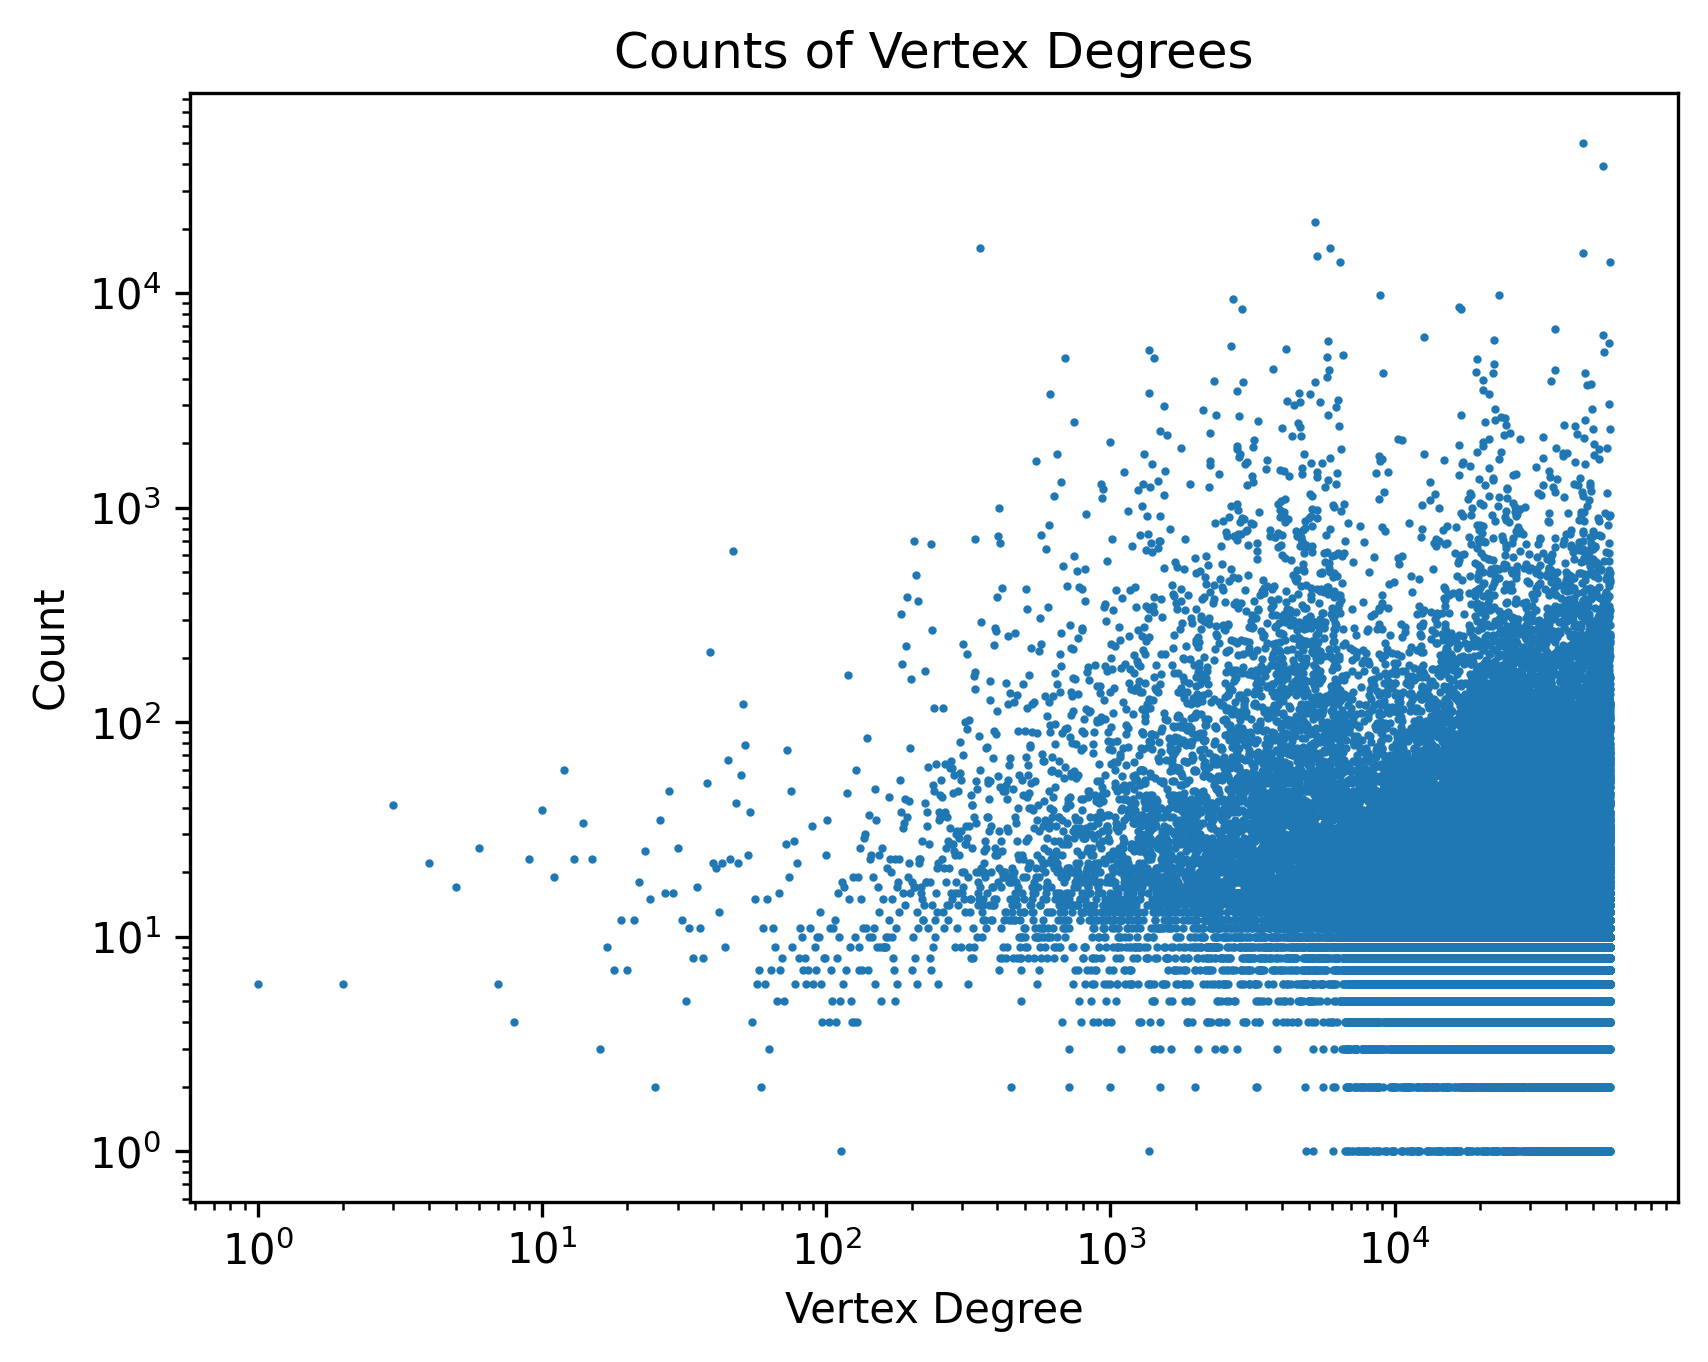

In [5]:
data = degree_count.items()
x, y = zip(*data)
fig, ax = plt.subplots()
ax.scatter(x, y, s=1)
plt.xscale("log")
plt.yscale("log")
plt.title('Counts of Vertex Degrees')
plt.xlabel('Vertex Degree')
plt.ylabel('Count')
plt.show()

In [6]:
origin = date(1970, 1, 1)
years = [(origin + timedelta(days=int(days))).year for _, _, days in edges]

In [7]:
def build_adj_matrix(edge_list):
    """Build a symmetric adjacency matrix from edge list."""
    EDGE_WEIGHT = np.ones(len(edge_list) * 2)  # each connection weights the same

    row_ind = np.concatenate((edge_list[:, 0], edge_list[:, 1]))
    col_ind = np.concatenate((edge_list[:, 1], edge_list[:, 0]))

    return sparse.csr_matrix(
        (
            EDGE_WEIGHT,
            (row_ind, col_ind),
        ),
        shape=(NUM_OF_VERTICES, NUM_OF_VERTICES),
        dtype=int
    )

NUM_OF_VERTICES = 57460 # number of concepts
ADJ_MAT = build_adj_matrix(edges)

G = nx.from_scipy_sparse_array(
    ADJ_MAT,
    parallel_edges=True,
    create_using=nx.MultiGraph
)

# Concepts

Filter: 
- Occurence >= 3
- Words >= 3

Element-specific:
- No single elements (i.e. Na)
- No duplicates (i.e. IIINV, CH3COONa, Ga2O3Gd2O3)

In [8]:
lookup = pd.read_csv("lookup.csv")

def transform(vs):
    return [lookup.loc[index]["concept"] for index in vs]

pd.set_option('display.max_columns', None) # no ... in listing
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
lookup.sort_values('count', ascending=False)[["concept", "count"]].head(250)

,concept,count
46020,scanning electron microscopy,12739
54032,transmission electron microscopy,10162
5268,SiC,6402
45991,scanning electron microscope,4115
5921,TiO2,4085
349,Al2O3,3988
5349,SiO2,3749
6442,ZnO,3706
57026,x-ray photoelectron spectroscopy,3307
36773,molecular dynamic simulation,3161


# Vertices

In [9]:
sorted_pairs = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)
sorted_pairs[:10]
[(transform([vertex])[0],count) for vertex,count in sorted_pairs]

[('scanning electron microscopy', 49997),
 ('transmission electron microscopy', 39250),
 ('SiC', 21423),
 ('Al2O3', 16233),
 ('TiO2', 16218),
 ('scanning electron microscope', 15376),
 ('SiO2', 14919),
 ('ZnO', 14027),
 ('x-ray photoelectron spectroscopy', 13965),
 ('fourier transform infrared spectroscopy', 9824),
 ('atomic force microscopy', 9772),
 ('GaN', 9411),
 ('density functional theory', 8653),
 ('differential scanning calorimetry', 8474),
 ('HSiC', 8412),
 ('molecular dynamic simulation', 6836),
 ('transmission electron microscope', 6357),
 ('chemical vapor deposition', 6226),
 ('finite element method', 6050),
 ('TiC', 6015),
 ('x-ray diffraction analysis', 5832),
 ('GaAs', 5669),
 ('NaCl', 5516),
 ('CO2', 5454),
 ('ultimate tensile strength', 5320),
 ('ZrO2', 5134),
 ('Ti6Al4V', 5024),
 ('AlN', 5002),
 ('CV', 4964),
 ('electron backscatter diffraction', 4927),
 ('finite element analysis', 4688),
 ('MgO', 4432),
 ('molecular beam epitaxy', 4403),
 ('TiN', 4401),
 ('electroche

# Communities

In [10]:
partition = nx.community.louvain_communities(G, resolution=15, threshold=1e-7)
densly_connected = [vs for vs in partition if len(vs) > 1]

print("Amount Communities", len(densly_connected))
[transform(vs) for vs in densly_connected]

Amount Communities 534


[['polymer based material',
  'flow field analysis',
  'ISO178',
  'fused deposition manufacturing',
  'fused deposition modeling',
  'fused deposition modelling',
  'fused filament fabrication',
  'fused filament fabrication technology',
  'ISO527',
  'selective laser sintering',
  'light alloy material',
  'rapid prototyping part',
  'rapid prototyping system',
  'wear and tear',
  'rapid prototyping technology',
  'fusion deposition modeling',
  'continuous fiber-reinforced composite',
  'HIPS',
  'aluminium conductor steel reinforced',
  'stainless steel particle',
  'infiltration casting technique',
  'catia v5 software',
  'acrylonitrile butadiene styrene',
  'layer thickness variation',
  'hip joint implant',
  'extrusion-based 3d printing',
  'wind tunnel test',
  'wind tunnel testing',
  'rapid tooling application',
  'non-linear dynamic behavior',
  'ordered porous aluminum',
  'open pore fraction',
  '3d printed component',
  'direct laser sintering',
  '3d printed material'

# Highly Connected Vertex Pairs

In [11]:
edge_counts = Counter(list(G.edges()))
filtered_edges = {tuple(transform(edge)):count for edge, count in edge_counts.most_common() if count > 10}
filtered_edges

{('scanning electron microscopy', 'transmission electron microscopy'): 2437,
 ('HSiC', 'SiC'): 1136,
 ('fourier transform infrared spectroscopy',
  'scanning electron microscopy'): 797,
 ('scanning electron microscopy', 'x-ray photoelectron spectroscopy'): 612,
 ('atomic force microscopy', 'scanning electron microscopy'): 606,
 ('AlGaN', 'GaN'): 578,
 ('SiC', 'SiO2'): 502,
 ('Al2O3', 'SiO2'): 499,
 ('differential scanning calorimetry', 'scanning electron microscopy'): 492,
 ('TiO2', 'scanning electron microscopy'): 487,
 ('scanning electron microscope', 'transmission electron microscope'): 469,
 ('FSW', 'friction stir welding'): 445,
 ('SBF', 'simulated body fluid'): 444,
 ('transmission electron microscopy', 'x-ray photoelectron spectroscopy'): 433,
 ('differential scanning calorimetry',
  'transmission electron microscopy'): 432,
 ('ZnO', 'scanning electron microscopy'): 430,
 ('energy dispersive spectroscopy', 'scanning electron microscopy'): 400,
 ('energy dispersive x-ray spectros

In [12]:
DAY_ORIGIN = date(1970, 1, 1)

def get_until(graph, day):
    return graph[graph[:, 2] < (day - DAY_ORIGIN).days]

years = [date(x, 12, 31) for x in range(1990, 2024)]


ccs = []
for year in tqdm(years):
    G = nx.from_scipy_sparse_array(
        build_adj_matrix(
            get_until(edges, year)
        ),
        parallel_edges=True,
        create_using=nx.MultiGraph
    )
        
    ccs.append(
       [c for c in nx.connected_components(G) if len(c) > 1]
    )



100%|████████████████████████████████████████████████████████████████| 34/34 [05:35<00:00,  9.86s/it]


# Connected Components

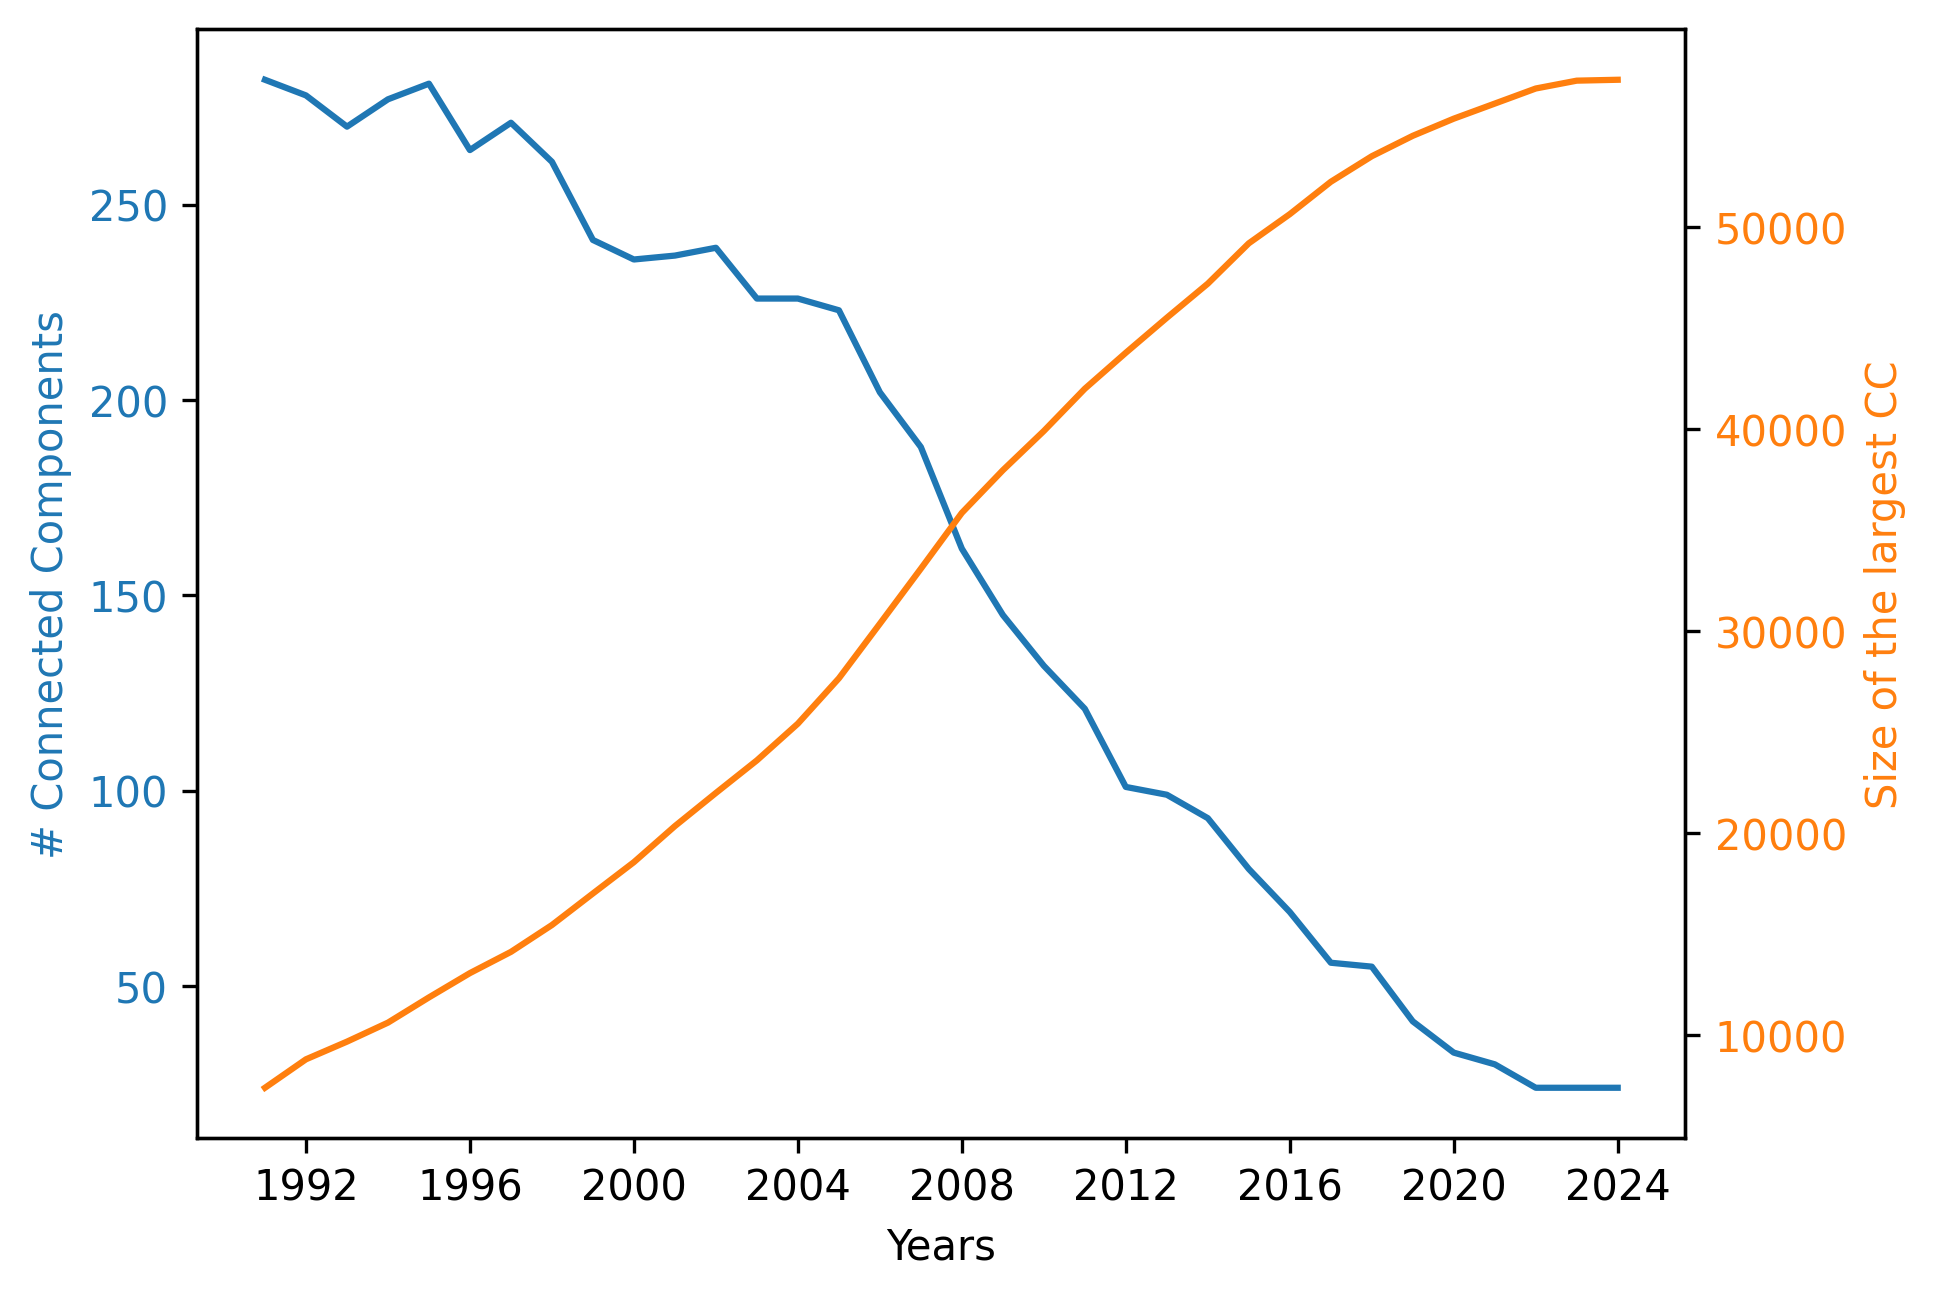

In [13]:
fig, ax1 = plt.subplots()
y1 = [len(c) for c in ccs]
y2 = [max({len(sub_c) for sub_c in c}) for c in ccs]

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('# Connected Components', color=color)
ax1.plot(years, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Size of the largest CC', color=color)
ax2.plot(years, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()